In [2]:
import pandas as pd
import numpy as np
from array import array
from scipy.stats import pearsonr

In [3]:
data = pd.read_csv("downsampled_data.csv")

In [4]:
data

,FSO_Att,RFL_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,...,TemperatureMax,TemperatureMin,Time,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin
0,2.462847,12.594497,9.323877,9.794615,9.219564,2012.233413,73500000000,0.000000,0.000000,0.000000,...,12.299355,11.580034,0,62342.65502,62365.930963,57591.768372,95.812499,2.368586,3.040772,2.165676
1,2.223769,11.312122,3.879325,4.212172,3.666104,2012.233896,83500000000,0.000000,0.000000,0.000000,...,5.937757,5.470371,0,39233.91891,40261.194736,39164.237830,143.879078,2.012548,2.273151,1.845938
2,2.045930,11.662737,5.808778,6.143394,5.416674,2012.136018,73500000000,0.000000,0.000000,0.000000,...,9.090033,8.281599,1,30489.41499,31745.470267,29332.638892,93.357959,0.542909,1.189790,0.512254
3,2.310503,12.481785,9.137414,9.981590,8.872329,2012.319275,73500000000,0.000000,0.000000,0.000000,...,12.723186,10.985366,1,68708.22615,68881.436362,63170.272763,130.043762,0.000000,0.000000,0.000000
4,2.896595,10.958442,4.630858,4.810972,4.404842,2012.260376,73500000000,0.000000,0.000000,0.000000,...,4.203552,3.858626,2,27775.95875,28453.735166,25643.380312,164.539508,0.621905,2.154707,0.560043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9102,6.942292,12.048804,5.547720,5.569641,5.194390,4827.826501,73500000000,36.520948,38.338306,34.454184,...,4.731866,4.419216,20,36436.58566,36729.014379,35648.858777,56.617752,2.078017,2.901343,2.038489
9103,7.021215,13.045728,5.065672,5.239689,4.568667,4827.882100,83500000000,22.283314,22.326295,21.292772,...,5.875741,5.113266,22,34937.87907,36070.864421,34285.183559,95.629279,1.402386,4.510712,1.320072
9104,6.189731,11.952553,5.102096,5.340282,5.024000,4827.689221,83500000000,13.826296,14.537510,12.675765,...,5.767751,5.592599,22,66958.43725,68487.370261,61239.320106,89.616035,2.276692,6.568379,2.181504
9105,8.130925,13.468460,6.502555,6.802885,6.006646,4827.843327,83500000000,0.000000,0.000000,0.000000,...,5.622045,5.024901,23,48650.00355,50920.058351,43981.597789,110.449013,1.221073,2.898400,1.117450


In [5]:
correlation_coefficient = data['RFL_Att'].corr(data['FSO_Att'])

# Print the result
print("Pearson Correlation Coefficient:", correlation_coefficient)

Pearson Correlation Coefficient: 0.07784859077941468


# Comparing with predicted (FSO and RF) generic model

In [6]:
# Defining the arrays correctly using numpy
predictons_rf_gen = pd.read_csv('Results/Gen_pred_RF.csv')

predictions_fso_gen = pd.read_csv('Results/Gen_pred_FSO.csv')

# Calculating the Pearson correlation coefficient
pearson_corr, _ = pearsonr(predictons_rf_gen, predictions_fso_gen)
print(f"Pearson Correlation Coefficient: {pearson_corr}")

Pearson Correlation Coefficient: [0.07256748]


# Comparing with predicted (FSO and RF) specific model

In [7]:
predictions_rf_spec = pd.read_csv('Results/Spe_pred_RF.csv')

predictions_fso_spe = pd.read_csv('Results/Spe_pred_FSO.csv')

In [8]:
# Calculating the Pearson correlation coefficient
pearson_corr, _ = pearsonr(predictions_rf_spec, predictions_fso_spe)
print(f"Pearson Correlation Coefficient: {pearson_corr}")

Pearson Correlation Coefficient: [-0.21716335]


# Comparing the predicted (FSO and RF) Method 3 model

In [9]:


import numpy as np
from scipy.stats import pearsonr

# Corrected arrays with commas separating the values
predictions_rf_mtd3 = pd.read_csv('Results/Mtd3_pred_RF.csv')

predictions_fso_mtd3 = pd.read_csv('Results/Mtd3_pred_FSO.csv')

# Calculate Pearson correlation coefficient
pearson_corr, _ = pearsonr(predictions_rf_mtd3, predictions_fso_mtd3)
print(f"Pearson Correlation Coefficient: {pearson_corr}")


Pearson Correlation Coefficient: [0.07862338]


# Visualisation

In [29]:
# Determine the target size (smallest array length)
target_size = 200

# Slice all arrays to the same size
actual_rf_resized = actual_rf[:target_size]
actual_fso_resized = actual_fso[:target_size]
pred_rf_generic_resized = pred_rf_generic[:target_size]
pred_fso_generic_resized = pred_fso_generic[:target_size]
pred_rf_specific_resized = pred_rf_specific[:target_size]
pred_fso_specific_resized = pred_fso_specific[:target_size]
pred_rf_method3_resized = pred_rf_method3[:target_size]
pred_fso_method3_resized = pred_fso_method3[:target_size]

# Verify the new sizes
print("All arrays resized to:", target_size)
print("Actual RF Length:", len(actual_rf_resized))
print("Actual FSO Length:", len(actual_fso_resized))
print("Predicted RF Generic Length:", len(pred_rf_generic_resized))
print("Predicted FSO Generic Length:", len(pred_fso_generic_resized))
print("Predicted RF Specific Length:", len(pred_rf_specific_resized))
print("Predicted FSO Specific Length:", len(pred_fso_specific_resized))
print("Predicted RF Method 3 Length:", len(pred_rf_method3_resized))
print("Predicted FSO Method 3 Length:", len(pred_fso_method3_resized))


All arrays resized to: 200
Actual RF Length: 200
Actual FSO Length: 200
Predicted RF Generic Length: 200
Predicted FSO Generic Length: 200
Predicted RF Specific Length: 200
Predicted FSO Specific Length: 200
Predicted RF Method 3 Length: 200
Predicted FSO Method 3 Length: 200


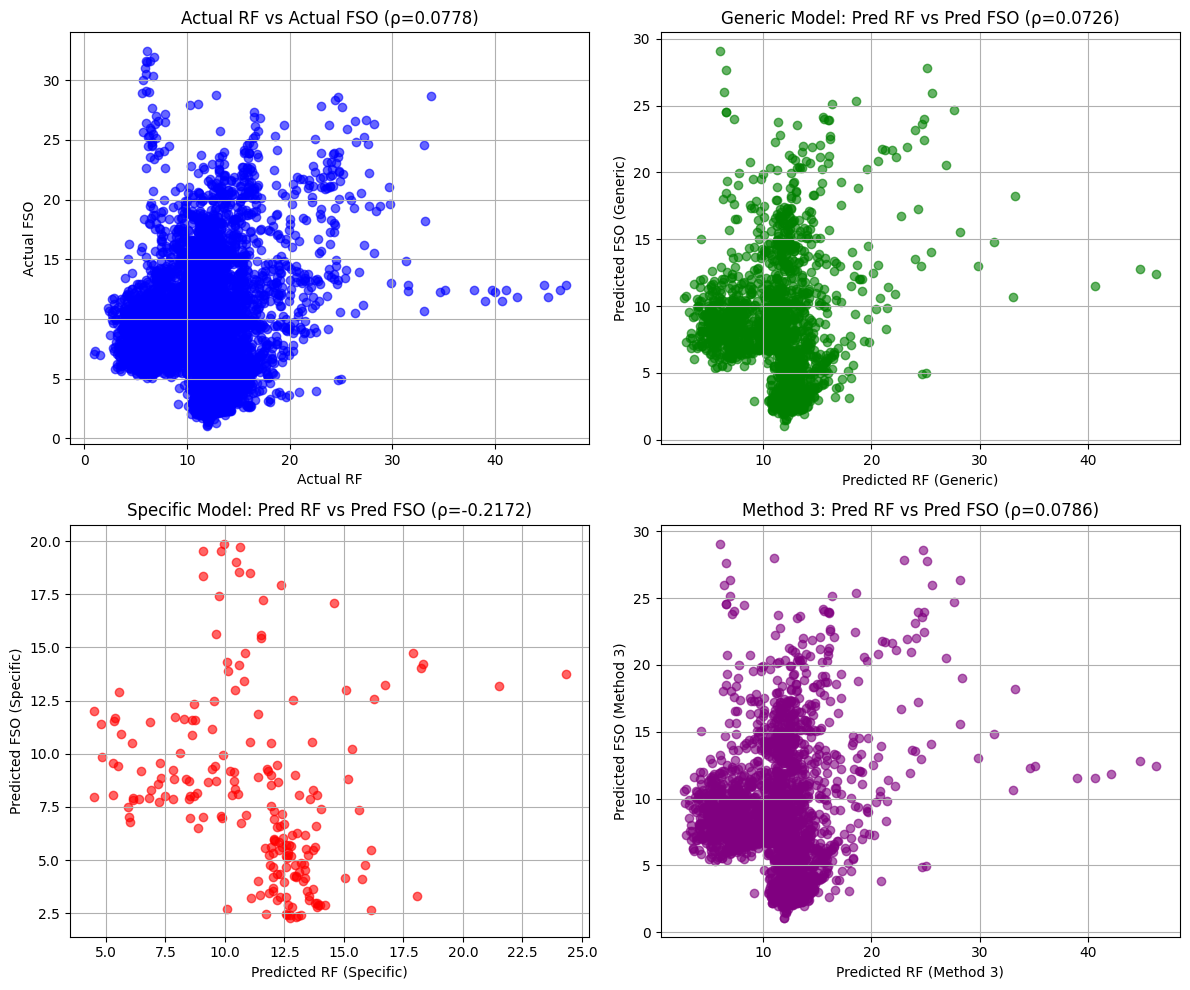

In [24]:
import matplotlib.pyplot as plt

# Convert all data to 1D arrays
actual_rf = data['RFL_Att'].values.ravel()  # Convert Actual RF to 1D array
actual_fso = data['FSO_Att'].values.ravel()  # Convert Actual FSO to 1D array

pred_rf_generic = np.array(predictons_rf_gen).ravel()  # Convert Predicted RF (Generic) to 1D array
pred_fso_generic = np.array(predictions_fso_gen).ravel()  # Convert Predicted FSO (Generic) to 1D array

pred_rf_specific = np.array(predictions_rf_spec).ravel()  # Convert Predicted RF (Specific) to 1D array
pred_fso_specific = np.array(predictions_fso_spe).ravel()  # Convert Predicted FSO (Specific) to 1D array

pred_rf_method3 = np.array(predictions_rf_mtd3).ravel()  # Convert Predicted RF (Method 3) to 1D array
pred_fso_method3 = np.array(predictions_fso_mtd3).ravel()  # Convert Predicted FSO (Method 3) to 1D array


# Pearson correlation values: replace with your calculated values
correlation_actual = 0.0778
correlation_generic = 0.0726
correlation_specific = -0.2172
correlation_method3 = 0.0786

# Subplot layout
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Actual RF vs Actual FSO
axes[0, 0].scatter(actual_rf, actual_fso, color='blue', alpha=0.6)
axes[0, 0].set_title(f'Actual RF vs Actual FSO (ρ={correlation_actual:.4f})')
axes[0, 0].set_xlabel('Actual RF')
axes[0, 0].set_ylabel('Actual FSO')
axes[0, 0].grid(True)

# 2. Predicted RF (Generic) vs Predicted FSO (Generic)
axes[0, 1].scatter(pred_rf_generic, pred_fso_generic, color='green', alpha=0.6)
axes[0, 1].set_title(f'Generic Model: Pred RF vs Pred FSO (ρ={correlation_generic:.4f})')
axes[0, 1].set_xlabel('Predicted RF (Generic)')
axes[0, 1].set_ylabel('Predicted FSO (Generic)')
axes[0, 1].grid(True)

# 3. Predicted RF (Specific) vs Predicted FSO (Specific)
axes[1, 0].scatter(pred_rf_specific, pred_fso_specific, color='red', alpha=0.6)
axes[1, 0].set_title(f'Specific Model: Pred RF vs Pred FSO (ρ={correlation_specific:.4f})')
axes[1, 0].set_xlabel('Predicted RF (Specific)')
axes[1, 0].set_ylabel('Predicted FSO (Specific)')
axes[1, 0].grid(True)

# 4. Predicted RF (Method 3) vs Predicted FSO (Method 3)
axes[1, 1].scatter(pred_rf_method3, pred_fso_method3, color='purple', alpha=0.6)
axes[1, 1].set_title(f'Method 3: Pred RF vs Pred FSO (ρ={correlation_method3:.4f})')
axes[1, 1].set_xlabel('Predicted RF (Method 3)')
axes[1, 1].set_ylabel('Predicted FSO (Method 3)')
axes[1, 1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


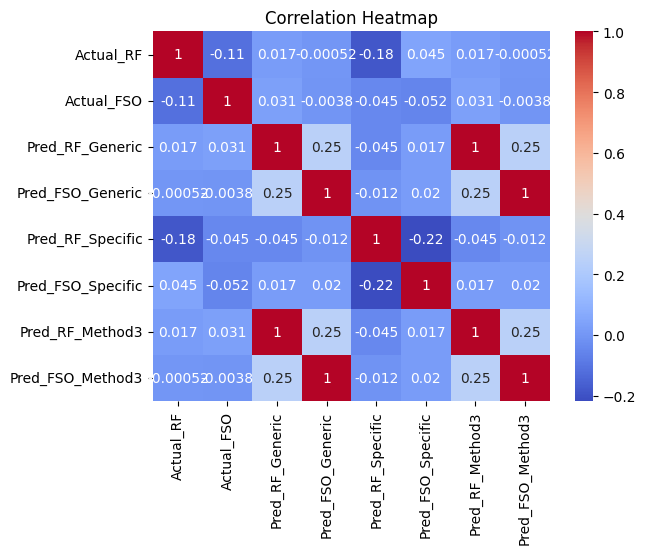

In [31]:
import seaborn as sns
import pandas as pd

# Example correlation heatmap
data = pd.DataFrame({
    'Actual_RF': actual_rf_resized,
    'Actual_FSO': actual_fso_resized,
    'Pred_RF_Generic': pred_rf_generic_resized,
    'Pred_FSO_Generic': pred_fso_generic_resized,
    'Pred_RF_Specific': pred_rf_specific_resized,
    'Pred_FSO_Specific': pred_fso_specific_resized,
    'Pred_RF_Method3': pred_rf_method3_resized,
    'Pred_FSO_Method3': pred_fso_method3_resized
})
corr = data.corr()  # Compute correlations
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


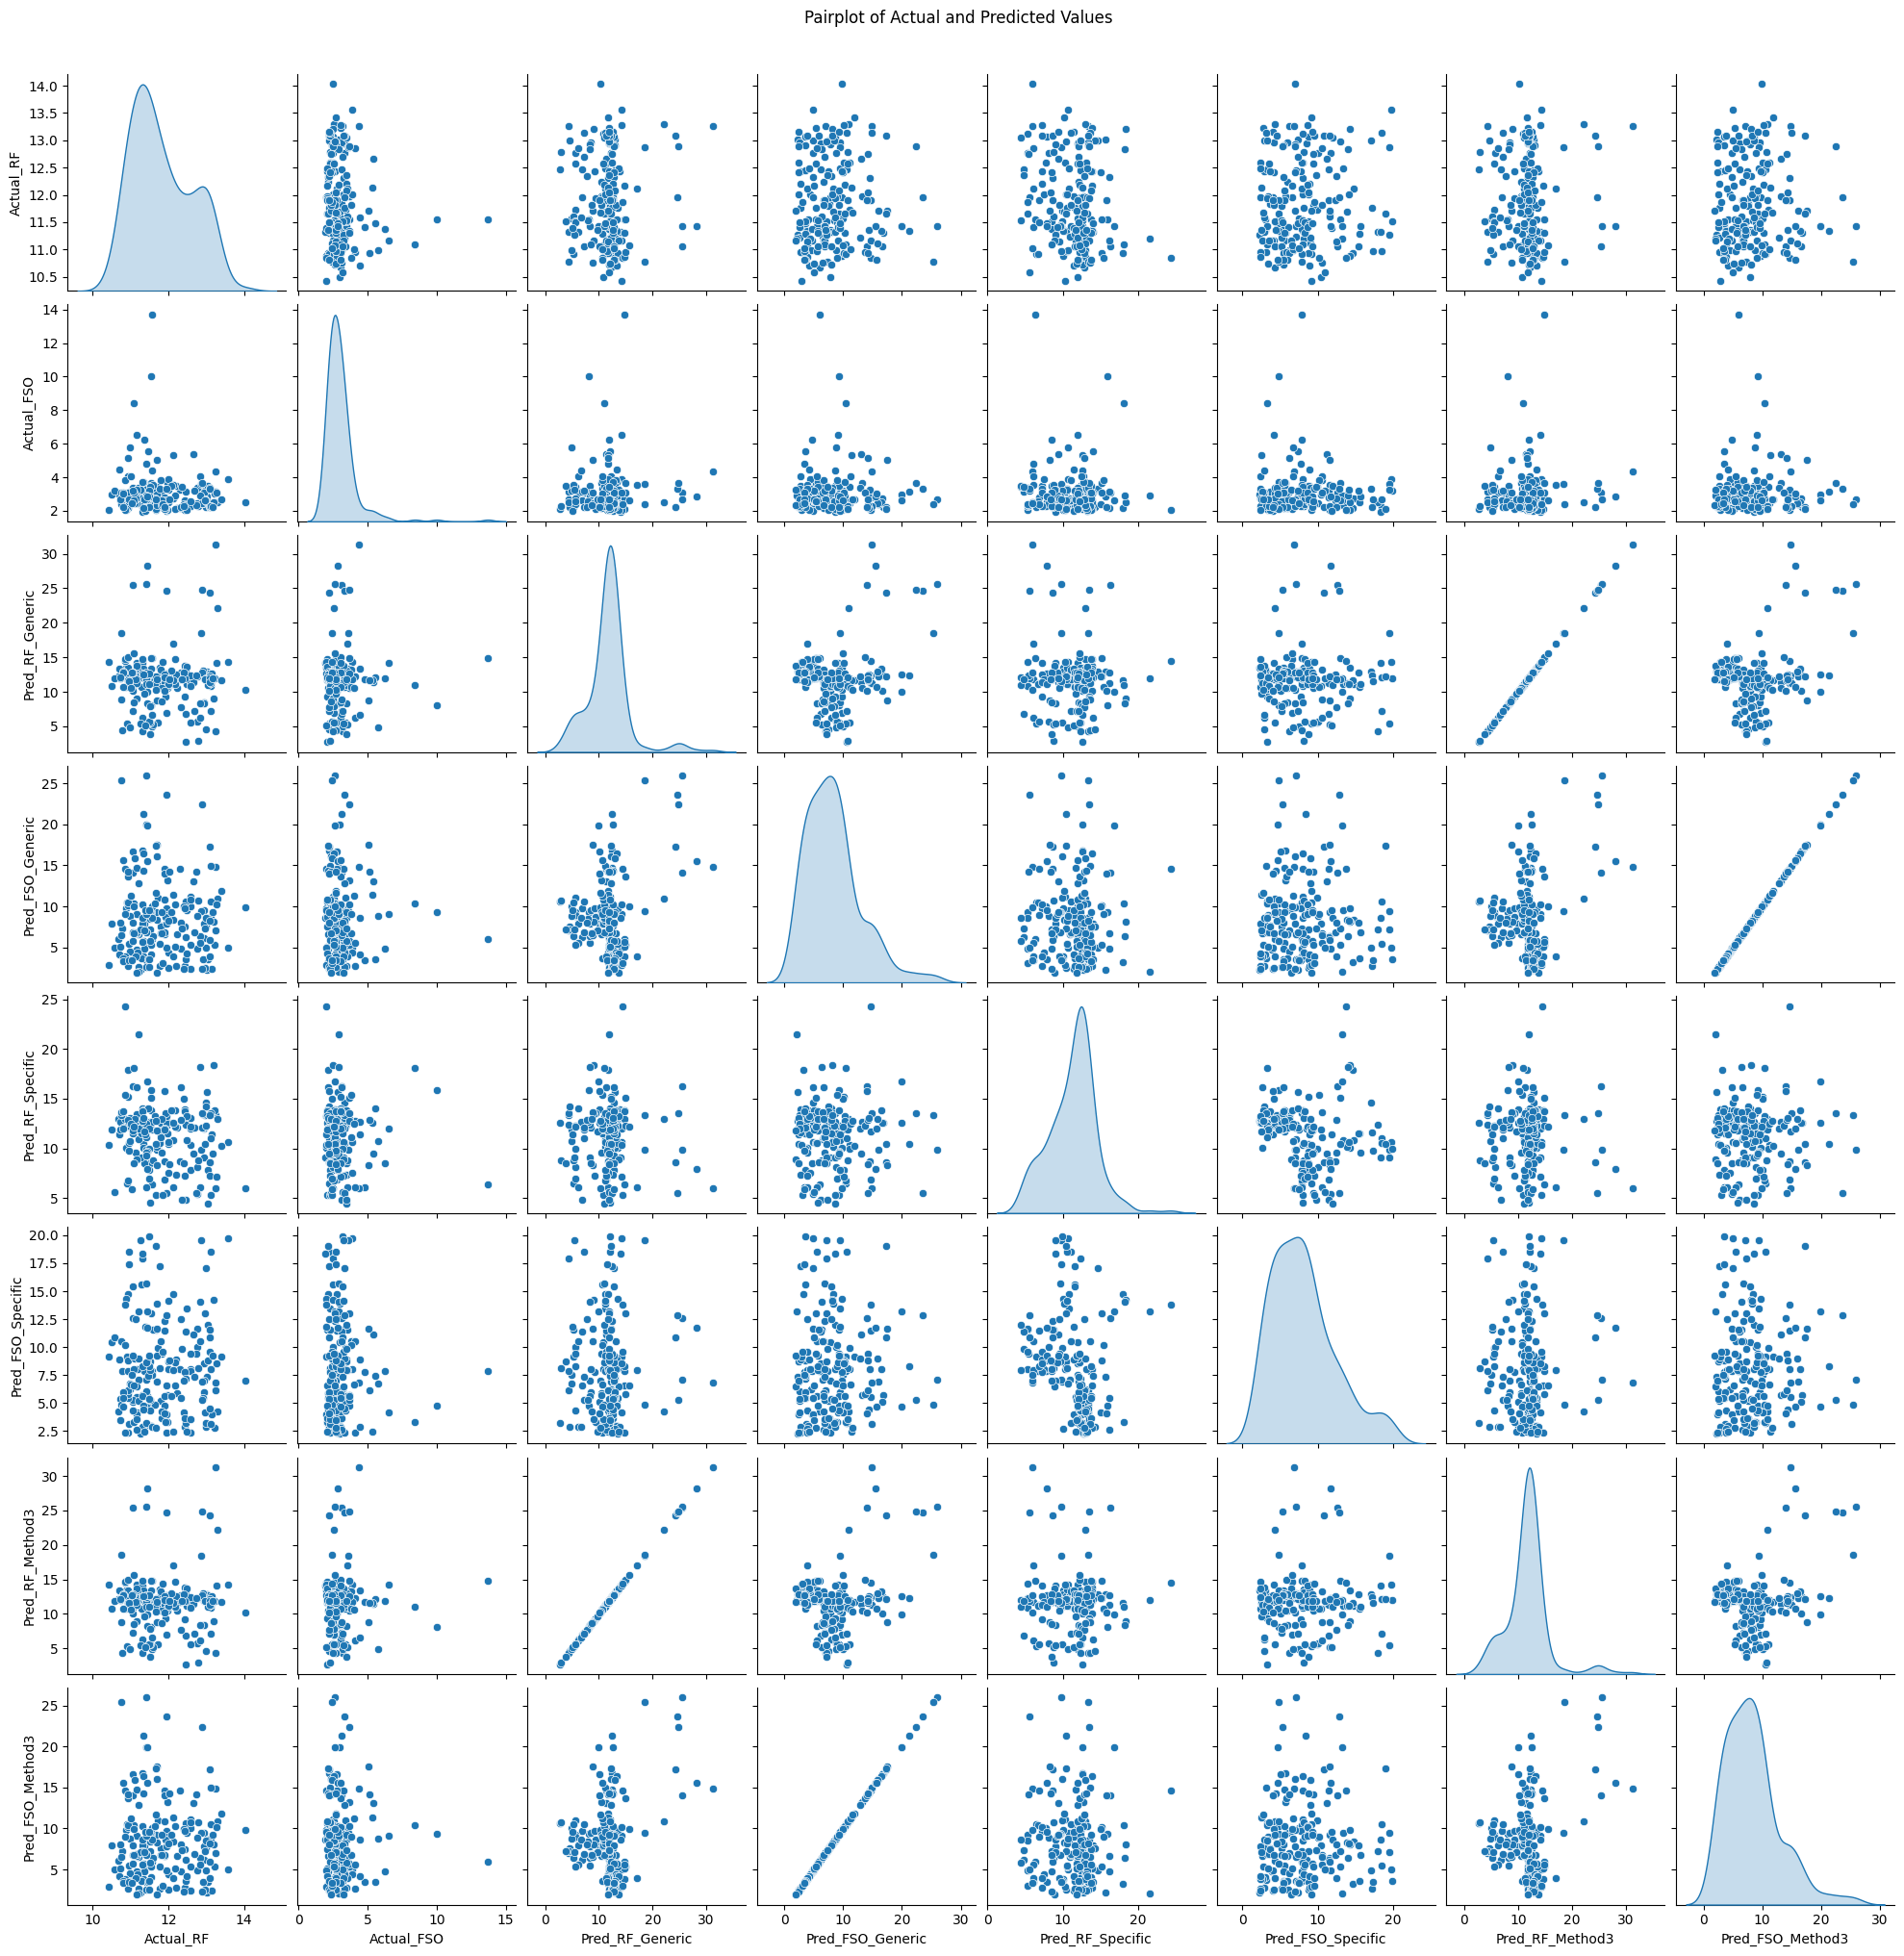

In [34]:
sns.pairplot(data, diag_kind='kde')
plt.suptitle('Pairplot of Actual and Predicted Values', y=1.02)
plt.show()


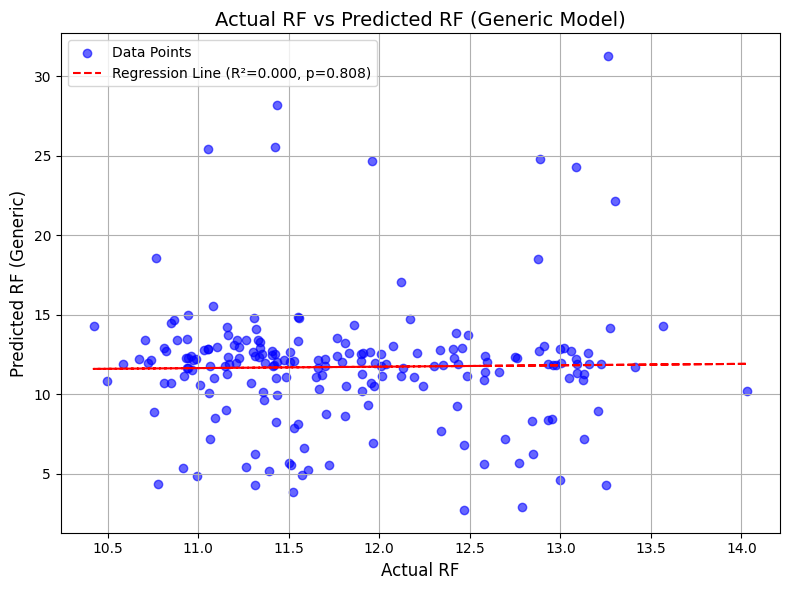

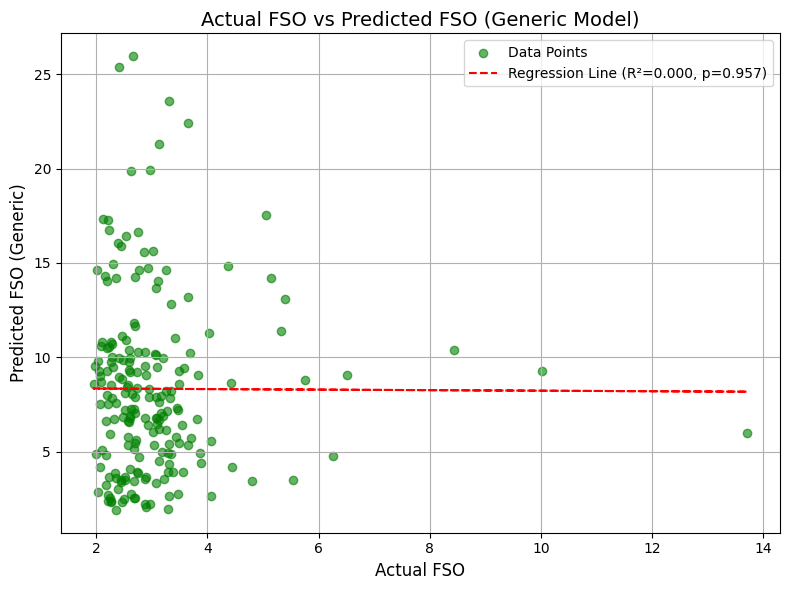

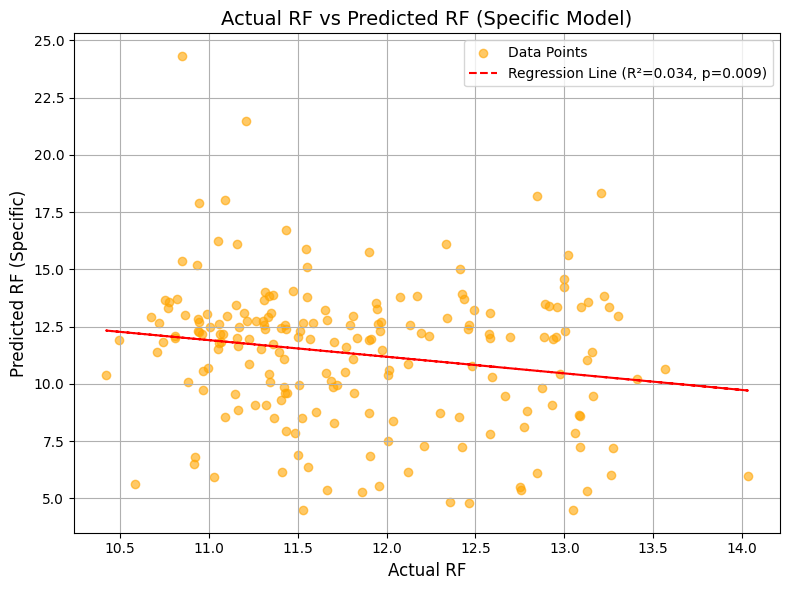

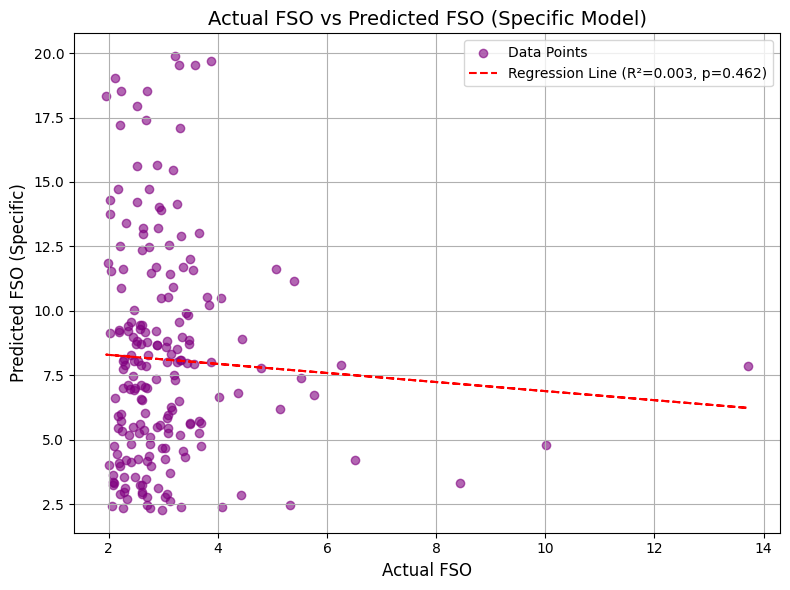

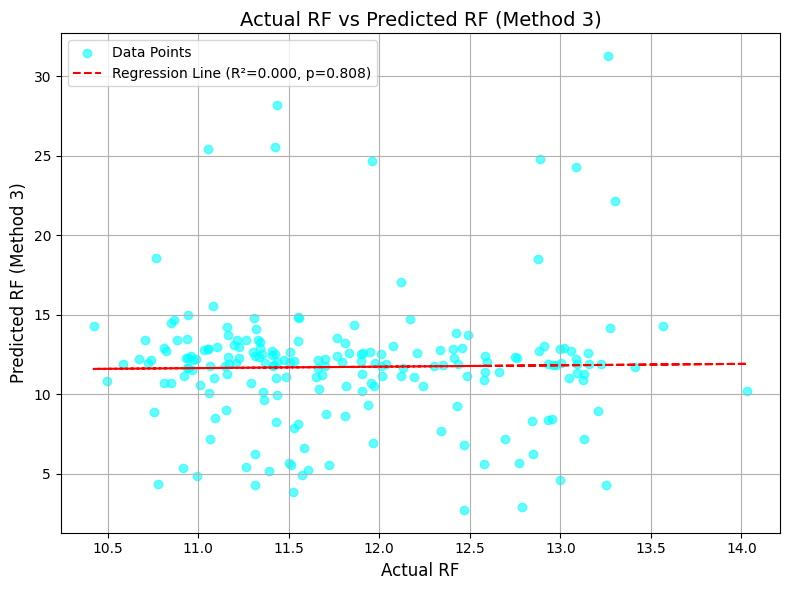

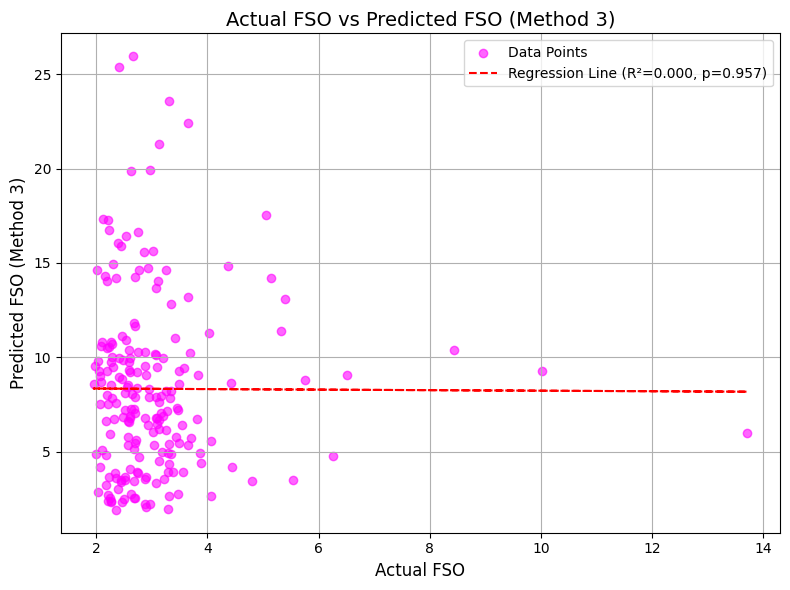

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Function to add a regression line to scatter plots
def add_regression_line(ax, x, y):
    slope, intercept, r_value, p_value, _ = linregress(x, y)
    line = slope * np.array(x) + intercept
    ax.plot(x, line, color='red', linestyle='--', label=f"Best Fit (R²={r_value**2:.3f})")
    return r_value, p_value

# Scatter plot for resized data
def plot_scatter_resized(x, y, title, xlabel, ylabel, color='blue'):
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, alpha=0.6, color=color, label='Data Points')
    slope, intercept, r_value, p_value, _ = linregress(x, y)
    plt.plot(x, slope * x + intercept, color='red', linestyle='--', 
             label=f"Regression Line (R²={r_value**2:.3f}, p={p_value:.3f})")
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example scatter plots for resized arrays
plot_scatter_resized(actual_rf_resized, pred_rf_generic_resized, 
                     "Actual RF vs Predicted RF (Generic Model)", 
                     "Actual RF", "Predicted RF (Generic)", color='blue')

plot_scatter_resized(actual_fso_resized, pred_fso_generic_resized, 
                     "Actual FSO vs Predicted FSO (Generic Model)", 
                     "Actual FSO", "Predicted FSO (Generic)", color='green')

plot_scatter_resized(actual_rf_resized, pred_rf_specific_resized, 
                     "Actual RF vs Predicted RF (Specific Model)", 
                     "Actual RF", "Predicted RF (Specific)", color='orange')

plot_scatter_resized(actual_fso_resized, pred_fso_specific_resized, 
                     "Actual FSO vs Predicted FSO (Specific Model)", 
                     "Actual FSO", "Predicted FSO (Specific)", color='purple')

plot_scatter_resized(actual_rf_resized, pred_rf_method3_resized, 
                     "Actual RF vs Predicted RF (Method 3)", 
                     "Actual RF", "Predicted RF (Method 3)", color='cyan')

plot_scatter_resized(actual_fso_resized, pred_fso_method3_resized, 
                     "Actual FSO vs Predicted FSO (Method 3)", 
                     "Actual FSO", "Predicted FSO (Method 3)", color='magenta')


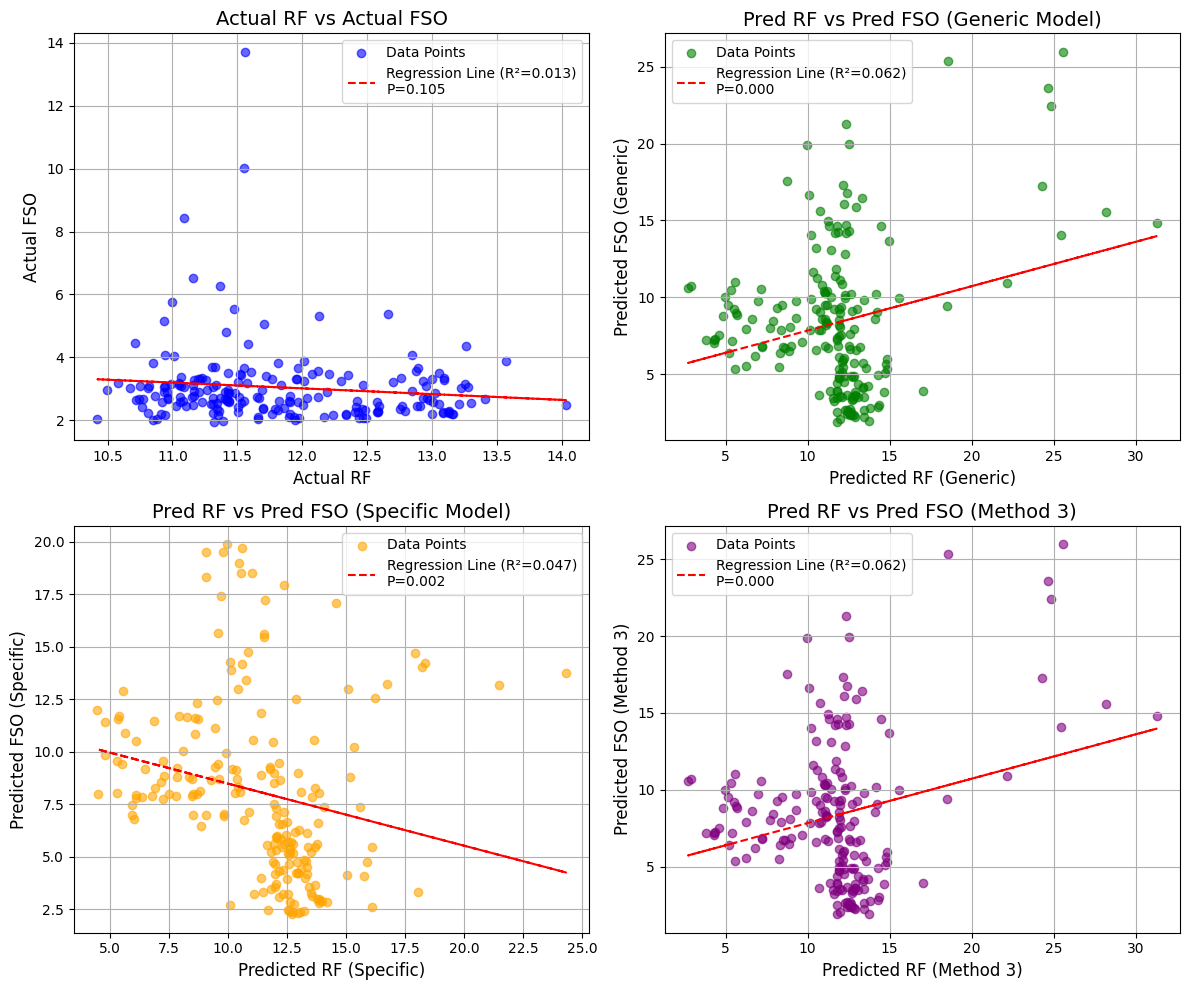

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Function to add a regression line
def add_regression_line(ax, x, y):
    slope, intercept, r_value, p_value, _ = linregress(x, y)
    line = slope * np.array(x) + intercept
    ax.plot(x, line, color='red', linestyle='--', label=f"Regression Line (R²={r_value**2:.3f})\nP={p_value:.3f}")
    return r_value, p_value

# Subplot layout
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Scatter Plot 1: Actual RF vs Actual FSO
axes[0, 0].scatter(actual_rf_resized, actual_fso_resized, alpha=0.6, color='blue', label='Data Points')
add_regression_line(axes[0, 0], actual_rf_resized, actual_fso_resized)
axes[0, 0].set_title("Actual RF vs Actual FSO", fontsize=14)
axes[0, 0].set_xlabel("Actual RF", fontsize=12)
axes[0, 0].set_ylabel("Actual FSO", fontsize=12)
axes[0, 0].grid(True)
axes[0, 0].legend()

# Scatter Plot 2: Pred RF vs Pred FSO (Generic Model)
axes[0, 1].scatter(pred_rf_generic_resized, pred_fso_generic_resized, alpha=0.6, color='green', label='Data Points')
add_regression_line(axes[0, 1], pred_rf_generic_resized, pred_fso_generic_resized)
axes[0, 1].set_title("Pred RF vs Pred FSO (Generic Model)", fontsize=14)
axes[0, 1].set_xlabel("Predicted RF (Generic)", fontsize=12)
axes[0, 1].set_ylabel("Predicted FSO (Generic)", fontsize=12)
axes[0, 1].grid(True)
axes[0, 1].legend()

# Scatter Plot 3: Pred RF vs Pred FSO (Specific Model)
axes[1, 0].scatter(pred_rf_specific_resized, pred_fso_specific_resized, alpha=0.6, color='orange', label='Data Points')
add_regression_line(axes[1, 0], pred_rf_specific_resized, pred_fso_specific_resized)
axes[1, 0].set_title("Pred RF vs Pred FSO (Specific Model)", fontsize=14)
axes[1, 0].set_xlabel("Predicted RF (Specific)", fontsize=12)
axes[1, 0].set_ylabel("Predicted FSO (Specific)", fontsize=12)
axes[1, 0].grid(True)
axes[1, 0].legend()

# Scatter Plot 4: Pred RF vs Pred FSO (Method 3)
axes[1, 1].scatter(pred_rf_method3_resized, pred_fso_method3_resized, alpha=0.6, color='purple', label='Data Points')
add_regression_line(axes[1, 1], pred_rf_method3_resized, pred_fso_method3_resized)
axes[1, 1].set_title("Pred RF vs Pred FSO (Method 3)", fontsize=14)
axes[1, 1].set_xlabel("Predicted RF (Method 3)", fontsize=12)
axes[1, 1].set_ylabel("Predicted FSO (Method 3)", fontsize=12)
axes[1, 1].grid(True)
axes[1, 1].legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


# Mutual Entropy

In [43]:

from sklearn.feature_selection import mutual_info_regression
import numpy as np

# Convert actual and predicted Series to numpy arrays and reshape them
y_rfl_test_array = actual_rf_resized.reshape(-1, 1)  # Actual RFL_Att
y_fso_test_array = actual_fso_resized.reshape(-1, 1) # Actual FSO_Att

# Generic Model
y_rfl_pred_generic_array = pred_rf_generic_resized.reshape(-1, 1)
y_fso_pred_generic_array = pred_fso_generic_resized.reshape(-1, 1)

# Specific Model
y_rfl_pred_specific_array = pred_rf_specific_resized.reshape(-1, 1)
y_fso_pred_specific_array = pred_fso_specific_resized.reshape(-1, 1)

# Method 3 Model
y_rfl_pred_method3_array = pred_rf_method3_resized.reshape(-1, 1)
y_fso_pred_method3_array = pred_fso_method3_resized.reshape(-1, 1)

# Calculate mutual information for actual values
mi_actual = mutual_info_regression(y_rfl_test_array, y_fso_test_array)
print(f"Mutual Information between Actual RFL_Att and FSO_Att: {mi_actual[0]:.4f}")

# Calculate mutual information for predicted values (Generic Model)
mi_predicted_generic = mutual_info_regression(y_rfl_pred_generic_array, y_fso_pred_generic_array)
print(f"Mutual Information between Predicted RFL_Att and FSO_Att (Generic Model): {mi_predicted_generic[0]:.4f}")

# Calculate mutual information for predicted values (Specific Model)
mi_predicted_specific = mutual_info_regression(y_rfl_pred_specific_array, y_fso_pred_specific_array)
print(f"Mutual Information between Predicted RFL_Att and FSO_Att (Specific Model): {mi_predicted_specific[0]:.4f}")

# Calculate mutual information for predicted values (Method 3 Model)
mi_predicted_method3 = mutual_info_regression(y_rfl_pred_method3_array, y_fso_pred_method3_array)
print(f"Mutual Information between Predicted RFL_Att and FSO_Att (Method 3 Model): {mi_predicted_method3[0]:.4f}")



Mutual Information between Actual RFL_Att and FSO_Att: 0.0876
Mutual Information between Predicted RFL_Att and FSO_Att (Generic Model): 0.3195
Mutual Information between Predicted RFL_Att and FSO_Att (Specific Model): 0.4846
Mutual Information between Predicted RFL_Att and FSO_Att (Method 3 Model): 0.3195


C:\Users\Jitendra Sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Jitendra Sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Jitendra Sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Jitendra Sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages

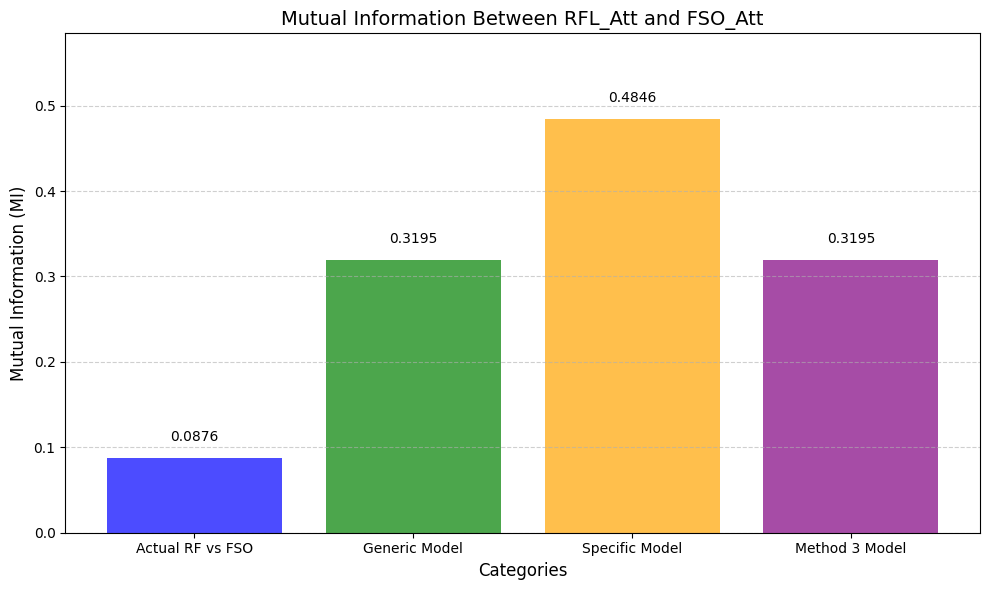

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# MI values (replace with your actual results)
mi_values = [
    0.0876,  # Actual RFL_Att vs FSO_Att
    0.3195,  # Predicted (Generic Model)
    0.4846,  # Predicted (Specific Model)
    0.3195   # Predicted (Method 3 Model)
]

# Labels for the categories
labels = [
    "Actual RF vs FSO",
    "Generic Model",
    "Specific Model",
    "Method 3 Model"
]

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, mi_values, color=['blue', 'green', 'orange', 'purple'], alpha=0.7)

# Add value annotations on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02, f"{height:.4f}", ha='center', fontsize=10)

# Title and labels
plt.title("Mutual Information Between RFL_Att and FSO_Att", fontsize=14)
plt.ylabel("Mutual Information (MI)", fontsize=12)
plt.xlabel("Categories", fontsize=12)
plt.ylim(0, max(mi_values) + 0.1)  # Add space above the tallest bar for text

# Grid and layout
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()


In [82]:
y_rfl_pred = pd.read_csv('Results/Gen_pred_RF.csv')

In [83]:
y_rfl_test = pd.read_csv('Results/y_test_rf.csv')

In [84]:
y_fso_test = pd.read_csv('Results/y_test_fso.csv')

In [85]:
y_fso_pred = pd.read_csv('Results/Gen_pred_FSO.csv')

In [86]:
X_test['RFL_Att_pred'] = y_rfl_pred

In [87]:
X_test['RFL_Att'] = y_rfl_test
X_test['FSO_Att'] = y_fso_test

In [88]:
X_test['FSO_Att_pred'] = y_fso_pred

# HeatMap for Generic Model.

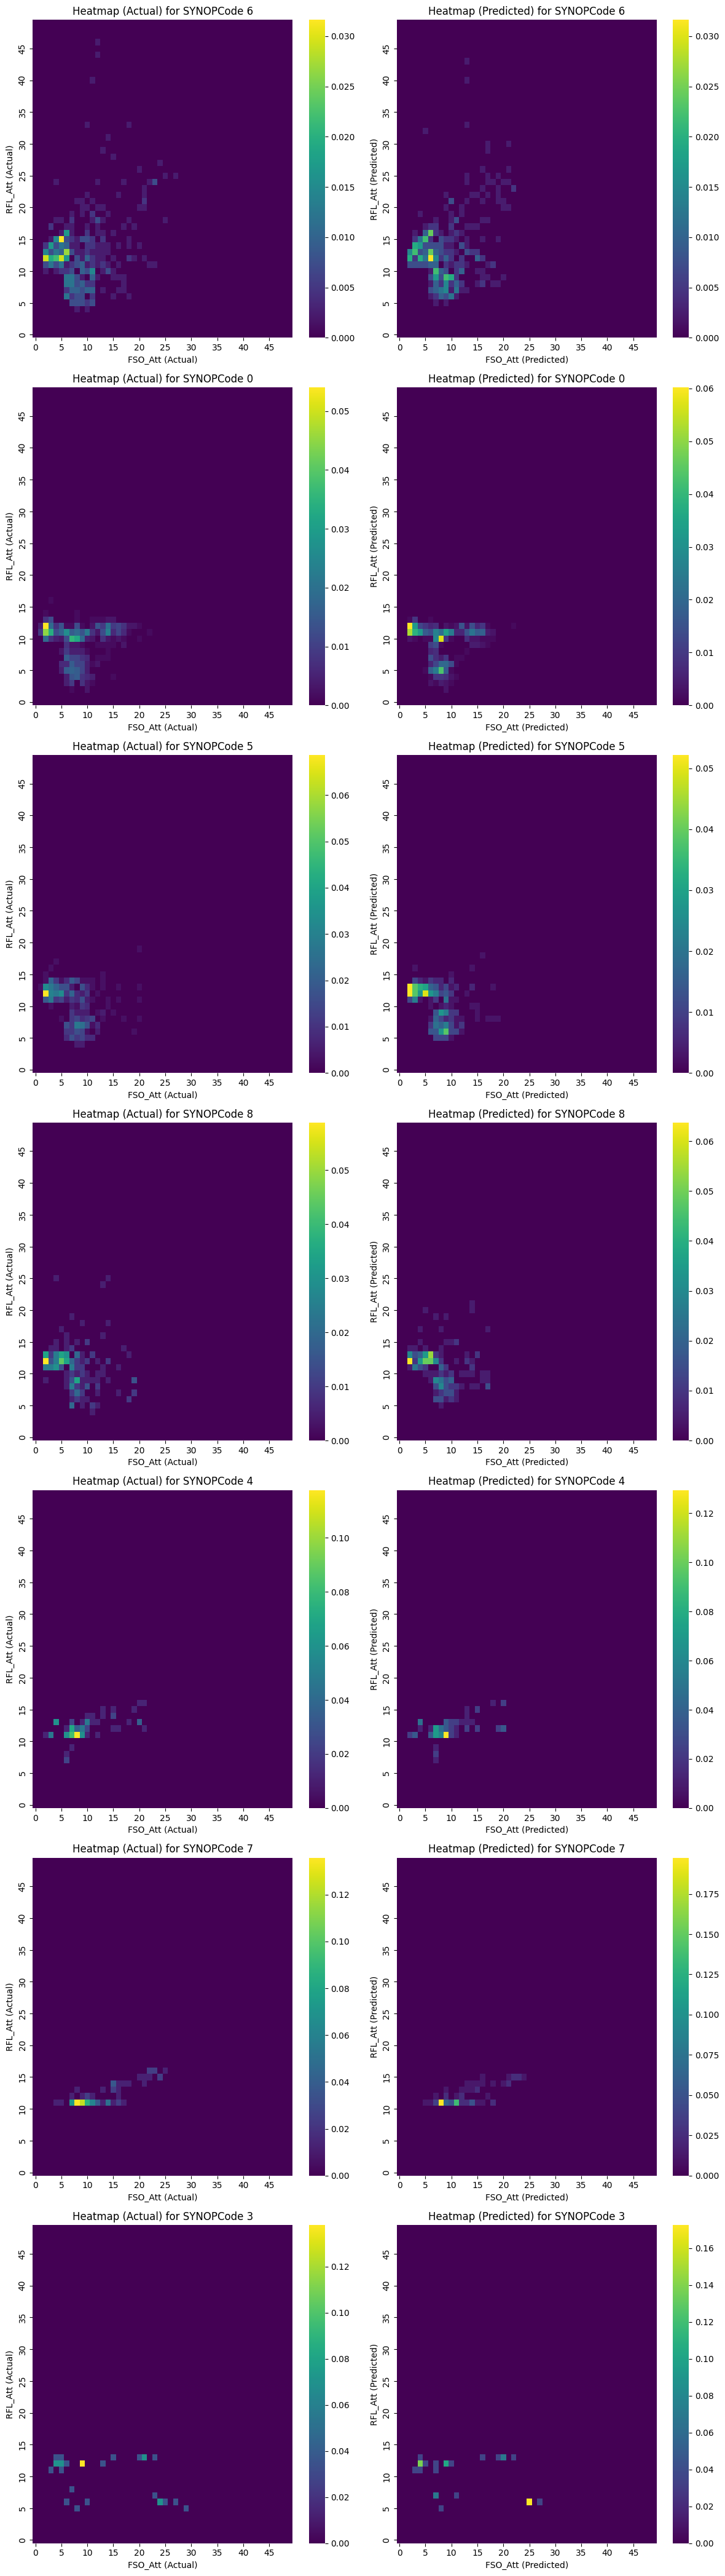


Entropy and Mutual Information Results:
   SYNOPCode  H_X_actual  H_Y_actual  H_XY_actual  Mutual_Info_actual  \
0          6    4.035938    4.080607     7.011910            1.104635   
1          0    3.828912    3.018114     6.259331            0.587695   
2          5    3.568738    3.244942     6.084213            0.729467   
3          8    3.684934    3.344626     5.983177            1.046383   
4          4    3.568638    2.302243     4.706812            1.164070   
5          7    3.878207    1.727875     4.518199            1.087883   
6          3    3.866433    2.362100     4.306257            1.922277   

   Normalized_MI_actual  H_X_predicted  H_Y_predicted  H_XY_predicted  \
0              0.157537       3.966806       4.012955        6.874845   
1              0.093891       3.665276       2.785058        5.751682   
2              0.119895       3.487749       3.033128        5.776314   
3              0.174887       3.659858       3.174978        5.816012   
4        

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import entropy

# Prepare a DataFrame to store entropy and mutual information results
results = []

# Collect unique SYNOPCodes (assuming SYNOPCode is a column in the X_test DataFrame)
unique_synop_codes = X_test['SYNOPCode'].unique()

# Create a figure for all heatmaps
num_synop_codes = len(unique_synop_codes)
fig, axes = plt.subplots(num_synop_codes, 2, figsize=(12, 6 * num_synop_codes))

for i, synop_code in enumerate(unique_synop_codes):
    # Filter the data for the current SYNOPCode
    df_filtered = X_test[X_test['SYNOPCode'] == synop_code]

    # --- Analysis for FSO_Att and RFL_Att ---
    fso_actual = df_filtered['FSO_Att']
    rfl_actual = df_filtered['RFL_Att']
    fso_predicted = df_filtered['FSO_Att_pred']
    rfl_predicted = df_filtered['RFL_Att_pred']

    # Create a 2D histogram for actual FSO and RFL (comparison of actuals)
    heatmap_data_actual, xedges_actual, yedges_actual = np.histogram2d(fso_actual, rfl_actual, bins=50, range=[[0, 50], [0, 50]])
    joint_prob_actual = heatmap_data_actual / heatmap_data_actual.sum()

    # Plot the heatmap for actual FSO and RFL
    sns.heatmap(joint_prob_actual.T, cmap='viridis', ax=axes[i, 0], cbar=True, xticklabels=5, yticklabels=5)
    axes[i, 0].invert_yaxis()
    axes[i, 0].set_title(f'Heatmap (Actual) for SYNOPCode {synop_code}')
    axes[i, 0].set_xlabel('FSO_Att (Actual)')
    axes[i, 0].set_ylabel('RFL_Att (Actual)')

    # Calculate entropies and mutual information for actual FSO and RFL
    marginal_x_actual = joint_prob_actual.sum(axis=1)
    marginal_y_actual = joint_prob_actual.sum(axis=0)
    H_X_actual = entropy(marginal_x_actual, base=2)
    H_Y_actual = entropy(marginal_y_actual, base=2)
    H_XY_actual = entropy(joint_prob_actual.ravel(), base=2)
    mutual_information_actual = H_X_actual + H_Y_actual - H_XY_actual

    # Create a 2D histogram for predicted FSO and RFL (comparison of predictions)
    heatmap_data_predicted, xedges_predicted, yedges_predicted = np.histogram2d(fso_predicted, rfl_predicted, bins=50, range=[[0, 50], [0, 50]])
    joint_prob_predicted = heatmap_data_predicted / heatmap_data_predicted.sum()

    # Plot the heatmap for predicted FSO and RFL
    sns.heatmap(joint_prob_predicted.T, cmap='viridis', ax=axes[i, 1], cbar=True, xticklabels=5, yticklabels=5)
    axes[i, 1].invert_yaxis()
    axes[i, 1].set_title(f'Heatmap (Predicted) for SYNOPCode {synop_code}')
    axes[i, 1].set_xlabel('FSO_Att (Predicted)')
    axes[i, 1].set_ylabel('RFL_Att (Predicted)')

    # Calculate entropies and mutual information for predicted FSO and RFL
    marginal_x_predicted = joint_prob_predicted.sum(axis=1)
    marginal_y_predicted = joint_prob_predicted.sum(axis=0)
    H_X_predicted = entropy(marginal_x_predicted, base=2)
    H_Y_predicted = entropy(marginal_y_predicted, base=2)
    H_XY_predicted = entropy(joint_prob_predicted.ravel(), base=2)
    mutual_information_predicted = H_X_predicted + H_Y_predicted - H_XY_predicted

    # Store results in a dictionary
    results.append({
        'SYNOPCode': synop_code,
        'H_X_actual': H_X_actual,
        'H_Y_actual': H_Y_actual,
        'H_XY_actual': H_XY_actual,
        'Mutual_Info_actual': mutual_information_actual,
        'Normalized_MI_actual': mutual_information_actual / H_XY_actual,
        'H_X_predicted': H_X_predicted,
        'H_Y_predicted': H_Y_predicted,
        'H_XY_predicted': H_XY_predicted,
        'Mutual_Info_predicted': mutual_information_predicted,
        'Normalized_MI_predicted': mutual_information_predicted / H_XY_predicted
    })

# Finalize the heatmap figure
plt.tight_layout()
plt.savefig('Results/Heatmap_Generic_plot.png', format='png', dpi=300)  # Save as PNG
plt.show()

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Save the results to a CSV file
results_df.to_csv('entropy_mutual_information_results_synopcode.csv', index=False)

# Display the results as a table
print("\nEntropy and Mutual Information Results:")
print(results_df)


# HeatMap for Specific Model

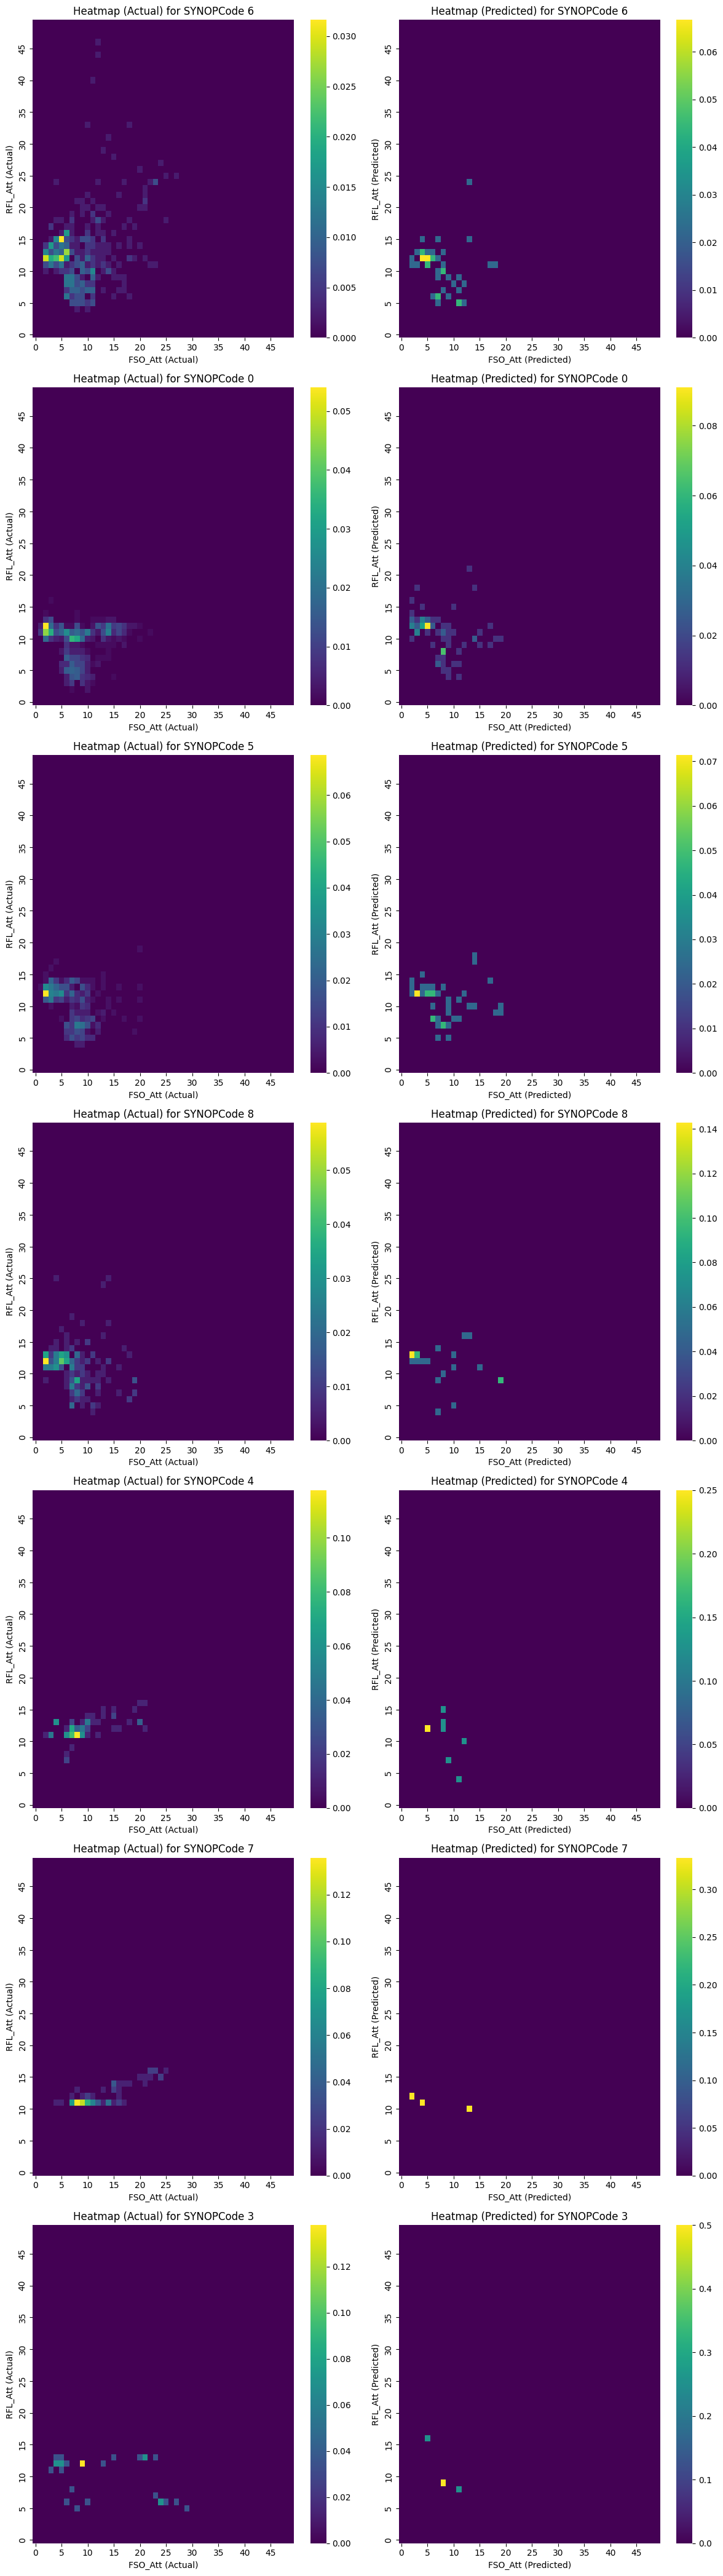


Entropy and Mutual Information Results:
   SYNOPCode  H_X_actual  H_Y_actual  H_XY_actual  Mutual_Info_actual  \
0          6    4.035938    4.080607     7.011910            1.104635   
1          0    3.828912    3.018114     6.259331            0.587695   
2          5    3.568738    3.244942     6.084213            0.729467   
3          8    3.684934    3.344626     5.983177            1.046383   
4          4    3.568638    2.302243     4.706812            1.164070   
5          7    3.878207    1.727875     4.518199            1.087883   
6          3    3.866433    2.362100     4.306257            1.922277   

   Normalized_MI_actual  H_X_predicted  H_Y_predicted  H_XY_predicted  \
0              0.157537       3.530060       3.210849        5.013858   
1              0.093891       3.704781       3.317984        5.389828   
2              0.119895       3.781633       3.210471        5.088630   
3              0.174887       3.236857       2.855905        3.975418   
4        

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import entropy

# Prepare a DataFrame to store entropy and mutual information results
results = []

# Collect unique SYNOPCodes (assuming SYNOPCode is a column in the X_test DataFrame)
unique_synop_codes = X_test['SYNOPCode'].unique()

# Create a figure for all heatmaps
num_synop_codes = len(unique_synop_codes)
fig, axes = plt.subplots(num_synop_codes, 2, figsize=(12, 6 * num_synop_codes))

for i, synop_code in enumerate(unique_synop_codes):
    # Filter the data for the current SYNOPCode
    df_filtered = X_test[X_test['SYNOPCode'] == synop_code]

    # --- Analysis for FSO_Att and RFL_Att ---
    fso_actual = df_filtered['FSO_Att']
    rfl_actual = df_filtered['RFL_Att']
    fso_predicted = df_filtered['FSO_Att_pred']
    rfl_predicted = df_filtered['RFL_Att_pred']

    # Create a 2D histogram for actual FSO and RFL (comparison of actuals)
    heatmap_data_actual, xedges_actual, yedges_actual = np.histogram2d(fso_actual, rfl_actual, bins=50, range=[[0, 50], [0, 50]])
    joint_prob_actual = heatmap_data_actual / heatmap_data_actual.sum()

    # Plot the heatmap for actual FSO and RFL
    sns.heatmap(joint_prob_actual.T, cmap='viridis', ax=axes[i, 0], cbar=True, xticklabels=5, yticklabels=5)
    axes[i, 0].invert_yaxis()
    axes[i, 0].set_title(f'Heatmap (Actual) for SYNOPCode {synop_code}')
    axes[i, 0].set_xlabel('FSO_Att (Actual)')
    axes[i, 0].set_ylabel('RFL_Att (Actual)')

    # Calculate entropies and mutual information for actual FSO and RFL
    marginal_x_actual = joint_prob_actual.sum(axis=1)
    marginal_y_actual = joint_prob_actual.sum(axis=0)
    H_X_actual = entropy(marginal_x_actual, base=2)
    H_Y_actual = entropy(marginal_y_actual, base=2)
    H_XY_actual = entropy(joint_prob_actual.ravel(), base=2)
    mutual_information_actual = H_X_actual + H_Y_actual - H_XY_actual

    # Create a 2D histogram for predicted FSO and RFL (comparison of predictions)
    heatmap_data_predicted, xedges_predicted, yedges_predicted = np.histogram2d(fso_predicted, rfl_predicted, bins=50, range=[[0, 50], [0, 50]])
    joint_prob_predicted = heatmap_data_predicted / heatmap_data_predicted.sum()

    # Plot the heatmap for predicted FSO and RFL
    sns.heatmap(joint_prob_predicted.T, cmap='viridis', ax=axes[i, 1], cbar=True, xticklabels=5, yticklabels=5)
    axes[i, 1].invert_yaxis()
    axes[i, 1].set_title(f'Heatmap (Predicted) for SYNOPCode {synop_code}')
    axes[i, 1].set_xlabel('FSO_Att (Predicted)')
    axes[i, 1].set_ylabel('RFL_Att (Predicted)')

    # Calculate entropies and mutual information for predicted FSO and RFL
    marginal_x_predicted = joint_prob_predicted.sum(axis=1)
    marginal_y_predicted = joint_prob_predicted.sum(axis=0)
    H_X_predicted = entropy(marginal_x_predicted, base=2)
    H_Y_predicted = entropy(marginal_y_predicted, base=2)
    H_XY_predicted = entropy(joint_prob_predicted.ravel(), base=2)
    mutual_information_predicted = H_X_predicted + H_Y_predicted - H_XY_predicted

    # Store results in a dictionary
    results.append({
        'SYNOPCode': synop_code,
        'H_X_actual': H_X_actual,
        'H_Y_actual': H_Y_actual,
        'H_XY_actual': H_XY_actual,
        'Mutual_Info_actual': mutual_information_actual,
        'Normalized_MI_actual': mutual_information_actual / H_XY_actual,
        'H_X_predicted': H_X_predicted,
        'H_Y_predicted': H_Y_predicted,
        'H_XY_predicted': H_XY_predicted,
        'Mutual_Info_predicted': mutual_information_predicted,
        'Normalized_MI_predicted': mutual_information_predicted / H_XY_predicted
    })

# Finalize the heatmap figure
plt.tight_layout()
plt.savefig('Results/Heatmap_Specific_plot.png', format='png', dpi=300)  # Save as PNG
plt.show()

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Save the results to a CSV file
results_df.to_csv('entropy_mutual_information_results_synopcode.csv', index=False)

# Display the results as a table
print("\nEntropy and Mutual Information Results:")
print(results_df)


# HeatMap for Method 3

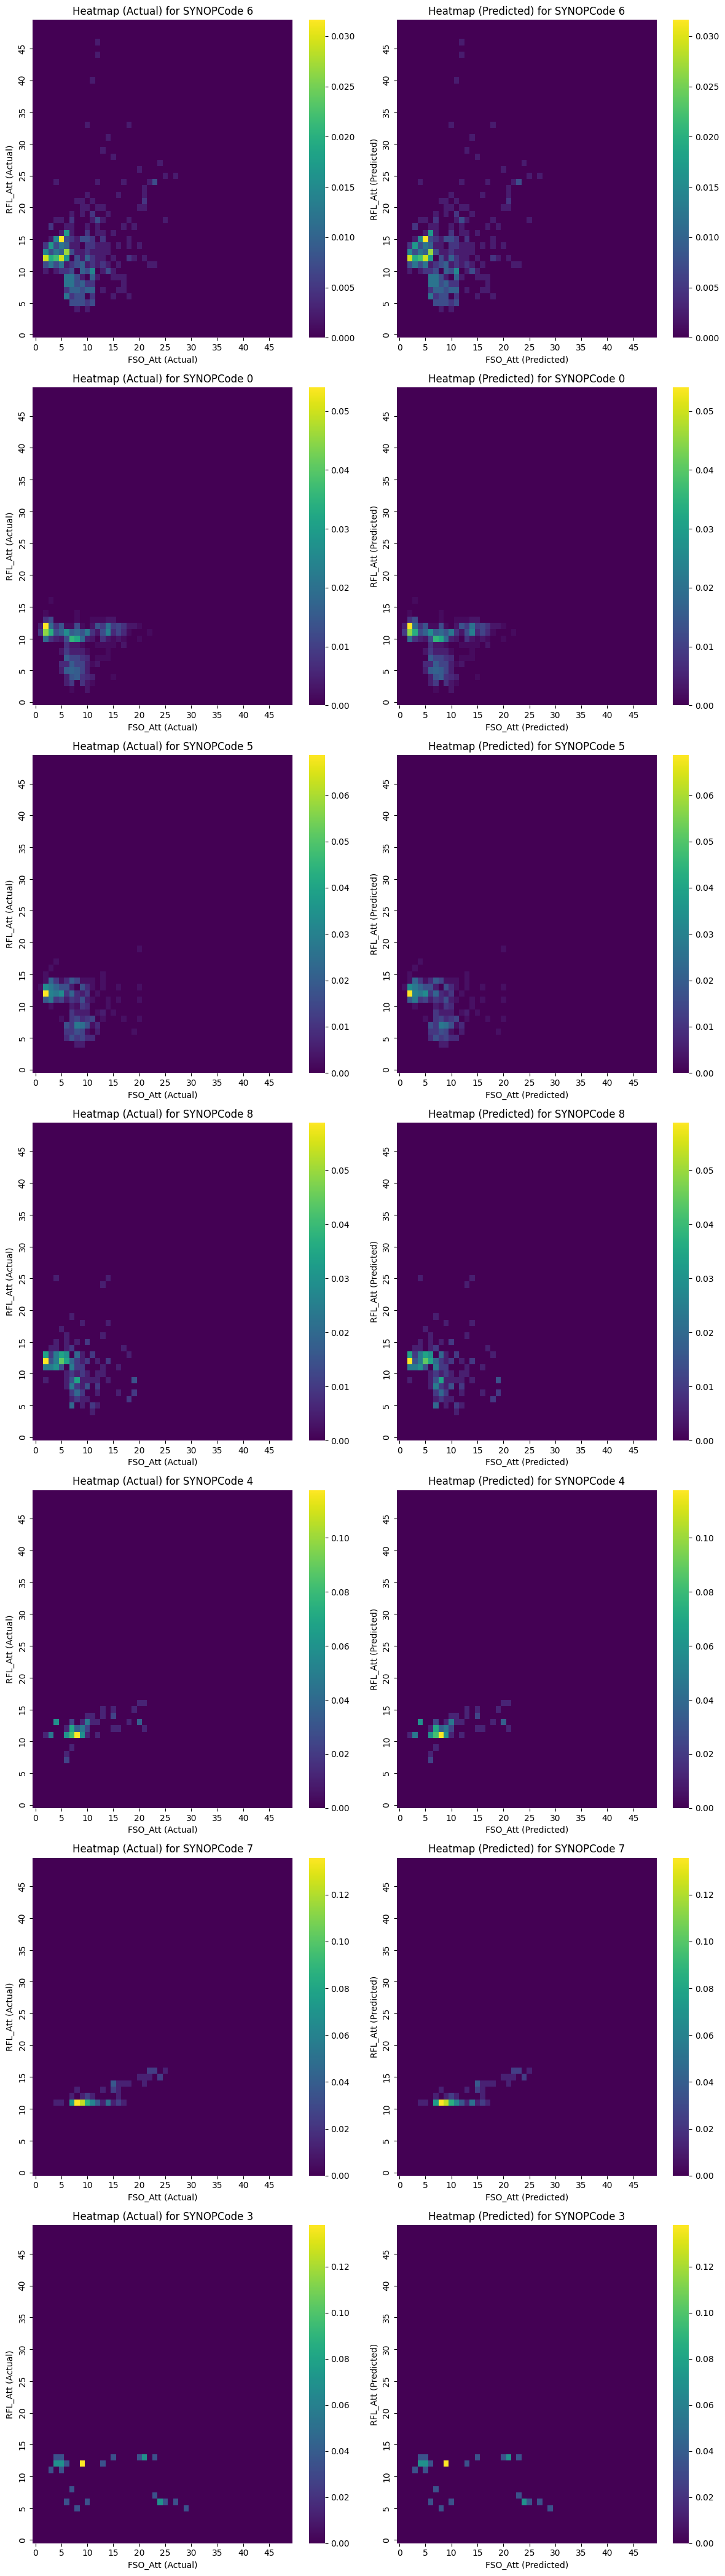


Entropy and Mutual Information Results:
   SYNOPCode  H_X_actual  H_Y_actual  H_XY_actual  Mutual_Info_actual  \
0          6    4.035938    4.080607     7.011910            1.104635   
1          0    3.828912    3.018114     6.259331            0.587695   
2          5    3.568738    3.244942     6.084213            0.729467   
3          8    3.684934    3.344626     5.983177            1.046383   
4          4    3.568638    2.302243     4.706812            1.164070   
5          7    3.878207    1.727875     4.518199            1.087883   
6          3    3.866433    2.362100     4.306257            1.922277   

   Normalized_MI_actual  H_X_predicted  H_Y_predicted  H_XY_predicted  \
0              0.157537       4.035938       4.080607        7.011910   
1              0.093891       3.828912       3.018114        6.259331   
2              0.119895       3.568738       3.244942        6.084213   
3              0.174887       3.684934       3.344626        5.983177   
4        

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import entropy

# Prepare a DataFrame to store entropy and mutual information results
results = []

# Collect unique SYNOPCodes (assuming SYNOPCode is a column in the X_test DataFrame)
unique_synop_codes = X_test['SYNOPCode'].unique()

# Create a figure for all heatmaps
num_synop_codes = len(unique_synop_codes)
fig, axes = plt.subplots(num_synop_codes, 2, figsize=(12, 6 * num_synop_codes))

for i, synop_code in enumerate(unique_synop_codes):
    # Filter the data for the current SYNOPCode
    df_filtered = X_test[X_test['SYNOPCode'] == synop_code]

    # --- Analysis for FSO_Att and RFL_Att ---
    fso_actual = df_filtered['FSO_Att']
    rfl_actual = df_filtered['RFL_Att']
    fso_predicted = df_filtered['FSO_Att_pred']
    rfl_predicted = df_filtered['RFL_Att_pred']

    # Create a 2D histogram for actual FSO and RFL (comparison of actuals)
    heatmap_data_actual, xedges_actual, yedges_actual = np.histogram2d(fso_actual, rfl_actual, bins=50, range=[[0, 50], [0, 50]])
    joint_prob_actual = heatmap_data_actual / heatmap_data_actual.sum()

    # Plot the heatmap for actual FSO and RFL
    sns.heatmap(joint_prob_actual.T, cmap='viridis', ax=axes[i, 0], cbar=True, xticklabels=5, yticklabels=5)
    axes[i, 0].invert_yaxis()
    axes[i, 0].set_title(f'Heatmap (Actual) for SYNOPCode {synop_code}')
    axes[i, 0].set_xlabel('FSO_Att (Actual)')
    axes[i, 0].set_ylabel('RFL_Att (Actual)')

    # Calculate entropies and mutual information for actual FSO and RFL
    marginal_x_actual = joint_prob_actual.sum(axis=1)
    marginal_y_actual = joint_prob_actual.sum(axis=0)
    H_X_actual = entropy(marginal_x_actual, base=2)
    H_Y_actual = entropy(marginal_y_actual, base=2)
    H_XY_actual = entropy(joint_prob_actual.ravel(), base=2)
    mutual_information_actual = H_X_actual + H_Y_actual - H_XY_actual

    # Create a 2D histogram for predicted FSO and RFL (comparison of predictions)
    heatmap_data_predicted, xedges_predicted, yedges_predicted = np.histogram2d(fso_predicted, rfl_predicted, bins=50, range=[[0, 50], [0, 50]])
    joint_prob_predicted = heatmap_data_predicted / heatmap_data_predicted.sum()

    # Plot the heatmap for predicted FSO and RFL
    sns.heatmap(joint_prob_predicted.T, cmap='viridis', ax=axes[i, 1], cbar=True, xticklabels=5, yticklabels=5)
    axes[i, 1].invert_yaxis()
    axes[i, 1].set_title(f'Heatmap (Predicted) for SYNOPCode {synop_code}')
    axes[i, 1].set_xlabel('FSO_Att (Predicted)')
    axes[i, 1].set_ylabel('RFL_Att (Predicted)')

    # Calculate entropies and mutual information for predicted FSO and RFL
    marginal_x_predicted = joint_prob_predicted.sum(axis=1)
    marginal_y_predicted = joint_prob_predicted.sum(axis=0)
    H_X_predicted = entropy(marginal_x_predicted, base=2)
    H_Y_predicted = entropy(marginal_y_predicted, base=2)
    H_XY_predicted = entropy(joint_prob_predicted.ravel(), base=2)
    mutual_information_predicted = H_X_predicted + H_Y_predicted - H_XY_predicted

    # Store results in a dictionary
    results.append({
        'SYNOPCode': synop_code,
        'H_X_actual': H_X_actual,
        'H_Y_actual': H_Y_actual,
        'H_XY_actual': H_XY_actual,
        'Mutual_Info_actual': mutual_information_actual,
        'Normalized_MI_actual': mutual_information_actual / H_XY_actual,
        'H_X_predicted': H_X_predicted,
        'H_Y_predicted': H_Y_predicted,
        'H_XY_predicted': H_XY_predicted,
        'Mutual_Info_predicted': mutual_information_predicted,
        'Normalized_MI_predicted': mutual_information_predicted / H_XY_predicted
    })

# Finalize the heatmap figure
plt.tight_layout()
plt.savefig('Results/Heatmap_MTD3_plot.png', format='png', dpi=300)  # Save as PNG
plt.show()

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Save the results to a CSV file
results_df.to_csv('entropy_mutual_information_results_synopcode.csv', index=False)

# Display the results as a table
print("\nEntropy and Mutual Information Results:")
print(results_df)
